In [54]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import importlib

from spotify_data import load_data
importlib.reload(sys.modules['spotify_data']) #force reload the module so it updates if I make changes to the original file

<module 'spotify_data' from '/Users/siddharthmaddikayala/repo/spotify_analysis/spotify_data.py'>

In [55]:
df = load_data()
print(df.columns)
print(df.shape)
print(df.head())

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
(952, 24)
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2

In [56]:
n = df["artist(s)_name"].nunique()
print(f"Number of different artists: {n}")

Number of different artists: 644


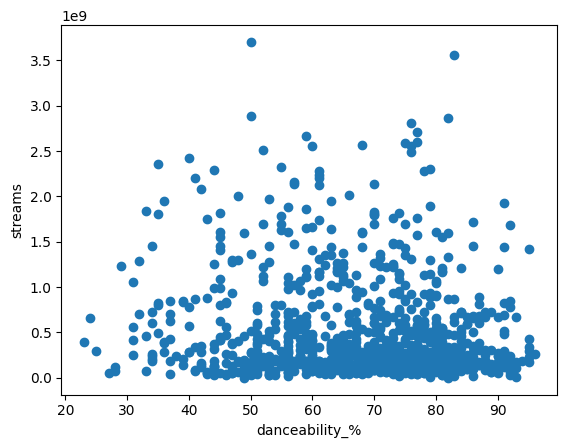

In [69]:
# Using graphs to see which features have a linear relationship to "streams" column
x = "danceability_%"
y = "streams"

plt.plot(df[x], df[y], linestyle='', marker='o')
plt.xlabel(x)
plt.ylabel(y)

plt.show()

In [77]:
# Finding the most popular artist by taking the average of the # of streams of each song that the artist has created. 
# Since songs that were released for longer time might have more views, the value of streams will be divided by the number of months it was released
# The artist with the highest average will be the most popular artist

avg_stream = dict()
num_songs = dict()



for artist in df['artist(s)_name']:
    avg_stream[artist] = 0
    num_songs[artist] = 0

i = 0
for _, row in df.iterrows():
    num_songs[row["artist(s)_name"]]+=1
    months = (2023-int(row["released_year"])) * 12 + (12.0-int(row["released_month"]))
    avg_stream[row["artist(s)_name"]] += float(row["streams"]) / float(months)

for key,value in avg_stream.items():
    avg_stream[key] = avg_stream[key]/num_songs[key]

avg_stream = dict(sorted(avg_stream.items(), key=lambda item: item[1], reverse=True))

most_popular = list(avg_stream.keys())[0]
print(f"Most popular artist/group of all time: {most_popular}")
print(f"Number of songs of {most_popular}: {num_songs[most_popular]}")

Most popular artist/group of all time: Justin Bieber, The Kid Laroi
Number of songs of Justin Bieber, The Kid Laroi: 1


In [92]:
rankings = sorted(list(avg_stream.values()))
def getRanking(streams, months_after_release): 
    stream_per_month = float(streams) / float(months_after_release)
    idx = len(rankings)
    for i in range(0, len(rankings)):
        if rankings[i]>stream_per_month:
            idx=i
            break
    
    print(f"This song is in the top {(float(i)/float(len(rankings))) * 100}% in terms of popularity.")
    


getRanking(100000001111111000000, 1)


This song is in the top 99.84472049689441% in terms of popularity.
